# Predict GPP from air temperature and surface moisture for a single grid cell

In [1]:
library(RCABLAB)

### Open the cube

In [4]:
library(grid)
cubepath   <- "/home/jovyan/work/datacube/cablab-datacube-0.2.3/low-res/"
cube       <- open.cube(cubepath)

Warning message:
“NAs introduced by coercion”

In [6]:
cube$data.dir.entries

[1] "aerosol_optical_thickness_1610"    "aerosol_optical_thickness_550"    
 [3] "aerosol_optical_thickness_555"     "aerosol_optical_thickness_659"    
 [5] "aerosol_optical_thickness_865"     "air_temperature_2m"               
 [7] "bare_soil_evaporation"             "black_sky_albedo"                 
 [9] "burnt_area"                        "c_emissions"                      
[11] "country_mask"                      "evaporation"                      
[13] "evaporative_stress"                "fractional_snow_cover"            
[15] "gross_primary_productivity"        "interception_loss"                
[17] "land_surface_temperature"          "latent_energy"                    
[19] "net_ecosystem_exchange"            "open_water_evaporation"           
[21] "ozone"                             "potential_evaporation"            
[23] "precipitation"                     "root_moisture"                    
[25] "sensible_heat"                     "snow_sublimation"                 
[27] "snow_water_equivalent"             "soil_moisture"                    
[29] "surface_moisture"                  "terrestrial_ecosystem_respiration"
[31] "transpiration"                     "water_mask"                       
[33] "water_vapour"                      "white_sky_albedo"

### Read the data

In [10]:
x<-read.cube(cube,variable=c("gross_primary_productivity","air_temperature_2m","surface_moisture"),
            longitude=50,latitude=50)

### Convert to data frame

In [39]:
d=data.frame(time=x$time,gpp=as.vector(x$gross_primary_productivity),tair=as.vector(x$air_temperature_2m),moist=as.vector(x$surface_moisture))
summary(d)

      time                          gpp               tair      
 Min.   :2001-01-01 00:00:00   Min.   :0.07691   Min.   :249.5  
 1st Qu.:2003-10-02 00:00:00   1st Qu.:0.17924   1st Qu.:271.1  
 Median :2006-06-30 00:00:00   Median :0.47574   Median :281.8  
 Mean   :2006-06-29 21:49:05   Mean   :0.76758   Mean   :281.6  
 3rd Qu.:2009-03-28 00:00:00   3rd Qu.:0.93506   3rd Qu.:292.7  
 Max.   :2011-12-27 00:00:00   Max.   :4.32885   Max.   :305.9  
     moist       
 Min.   :0.1552  
 1st Qu.:0.2110  
 Median :0.2813  
 Mean   :0.2647  
 3rd Qu.:0.3096  
 Max.   :0.3814  

### Fit a linear and a quadratic model

In [34]:
linearmodel = lm(gpp ~ tair + moist,d)
quadraticmodel = lm(gpp ~ (tair+moist)^2,d)

In [35]:
summary(model)


Call:
lm(formula = gpp ~ tair + moist, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0601 -0.4203 -0.1730  0.1767  3.3150 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.850860   1.129952  -14.03  < 2e-16 ***
tair          0.053456   0.003452   15.49  < 2e-16 ***
moist         5.908664   0.761384    7.76 4.76e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.668 on 503 degrees of freedom
Multiple R-squared:  0.3495,	Adjusted R-squared:  0.3469 
F-statistic: 135.1 on 2 and 503 DF,  p-value: < 2.2e-16


In [36]:
summary(quadraticmodel)


Call:
lm(formula = gpp ~ (tair + moist)^2, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3670 -0.3870 -0.1245  0.2020  3.0557 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   25.66050    4.86858   5.271 2.02e-07 ***
tair          -0.08993    0.01673  -5.375 1.17e-07 ***
moist       -145.00713   17.29481  -8.384 5.18e-16 ***
tair:moist     0.52458    0.06007   8.733  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.623 on 502 degrees of freedom
Multiple R-squared:  0.4353,	Adjusted R-squared:  0.432 
F-statistic:   129 on 3 and 502 DF,  p-value: < 2.2e-16


### And plot the results

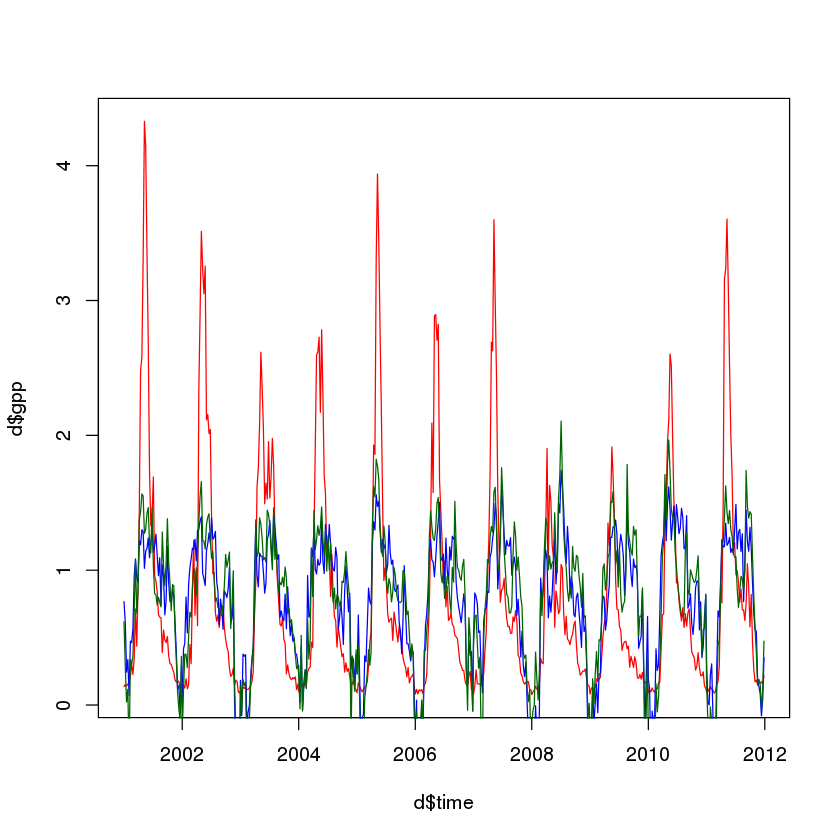

In [37]:
plot(d$time,d$gpp,"l",col="red")
lines(d$time,predict(model),col="blue")
lines(d$time,predict(quadraticmodel),col="darkgreen")